Fake News Classifier using Multinomial Naive Bayes (96% accuracy)

In [ ]:
import pandas as pd

In [3]:
t = pd.read_csv('True.csv')

In [4]:
f = pd.read_csv('Fake.csv')

In [5]:
t.head()

,title,text,subject,date
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017"
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017"
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017"
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017"
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017"


In [6]:
f.head()

,title,text,subject,date
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017"
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017"
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017"
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017"
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017"


In [7]:
t.shape

(21417, 4)

In [8]:
f.shape

(23481, 4)

In [9]:
t = t.dropna()

In [10]:
f = f.dropna()

In [11]:
tmp = pd.DataFrame({'label':[1]*t.shape[0]})
t = pd.concat([t,tmp],axis=1)

In [12]:
t.head()

,title,text,subject,date,label
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017",1
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017",1
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017",1
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017",1
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017",1


In [13]:
tmp = pd.DataFrame({'label':[0]*f.shape[0]})
f = pd.concat([f,tmp],axis=1)

In [14]:
f.head()

,title,text,subject,date,label
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017",0
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017",0
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017",0
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017",0
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017",0


In [15]:
df = t.append(f)

In [16]:
df = df.sample(frac=1)

In [17]:
df.shape

(44898, 5)

In [18]:
df.head()

,title,text,subject,date,label
8839,"Trump adviser, on Moscow visit, dodges questio...",MOSCOW (Reuters) - A foreign-policy adviser to...,politicsNews,"July 7, 2016",1
1558,Republicans Are Livid After Seeing This Photo...,"The right is up in arms. No, not because Sally...",News,"May 8, 2017",0
13339,FIRE THIS MAN! STATE DEPARTMENT ASSHAT Mocks R...,How unfunny! Does this not tell you something ...,politics,"Aug 4, 2016",0
11690,Exclusive: Cameroonian troops entered Nigeria ...,ABUJA/DAKAR (Reuters) - Cameroonian troops thi...,worldnews,"December 20, 2017",1
671,"Republicans Respond To Trump’s Threats, Presi...",No one takes Donald Trump seriously anymore. N...,News,"August 4, 2017",0


In [19]:
df.reset_index(inplace=True)

In [20]:
df.head()

,index,title,text,subject,date,label
0,8839,"Trump adviser, on Moscow visit, dodges questio...",MOSCOW (Reuters) - A foreign-policy adviser to...,politicsNews,"July 7, 2016",1
1,1558,Republicans Are Livid After Seeing This Photo...,"The right is up in arms. No, not because Sally...",News,"May 8, 2017",0
2,13339,FIRE THIS MAN! STATE DEPARTMENT ASSHAT Mocks R...,How unfunny! Does this not tell you something ...,politics,"Aug 4, 2016",0
3,11690,Exclusive: Cameroonian troops entered Nigeria ...,ABUJA/DAKAR (Reuters) - Cameroonian troops thi...,worldnews,"December 20, 2017",1
4,671,"Republicans Respond To Trump’s Threats, Presi...",No one takes Donald Trump seriously anymore. N...,News,"August 4, 2017",0


In [21]:
messages = df.copy()

In [22]:
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
import re

In [27]:
ps = PorterStemmer()
corpus = []
for i in range(0, len(messages)):
    review = re.sub('[^a-zA-Z]', ' ', messages['text'][i])
    review = review.lower()
    review = review.split()
    
    review = [ps.stem(word) for word in review if not word in stopwords.words('english')]
    review = ' '.join(review)
    corpus.append(review)

In [26]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [28]:
y = df['label']

In [29]:
y.head()

0    1
1    0
2    0
3    1
4    0
Name: label, dtype: int64

In [31]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

In [50]:
tfidf_v=TfidfVectorizer(max_features=5000,ngram_range=(1,3))
x=tfidf_v.fit_transform(corpus).toarray()

In [59]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state=0)

In [51]:
tfidf_v.get_feature_names()[:20]

['abadi',
 'abandon',
 'abba',
 'abc',
 'abc news',
 'abdullah',
 'abe',
 'abedin',
 'abid',
 'abil',
 'abl',
 'abort',
 'abroad',
 'absenc',
 'absolut',
 'absurd',
 'abu',
 'abus',
 'academ',
 'academi']

In [52]:
tfidf_v.get_params()

{'analyzer': 'word',
 'binary': False,
 'decode_error': 'strict',
 'dtype': numpy.float64,
 'encoding': 'utf-8',
 'input': 'content',
 'lowercase': True,
 'max_df': 1.0,
 'max_features': 5000,
 'min_df': 1,
 'ngram_range': (1, 3),
 'norm': 'l2',
 'preprocessor': None,
 'smooth_idf': True,
 'stop_words': None,
 'strip_accents': None,
 'sublinear_tf': False,
 'token_pattern': '(?u)\\b\\w\\w+\\b',
 'tokenizer': None,
 'use_idf': True,
 'vocabulary': None}

In [54]:
import matplotlib.pyplot as plt

In [55]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    See full source and example: 
    http://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html
    
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [56]:
from sklearn.naive_bayes import MultinomialNB
classifier=MultinomialNB()

In [57]:
from sklearn import metrics
import numpy as np
import itertools

In [60]:
classifier.fit(x_train, y_train)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

accuracy:   0.949
Confusion matrix, without normalization


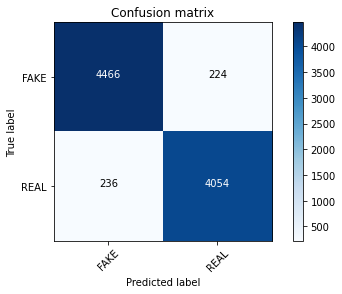

In [61]:
pred = classifier.predict(x_test)
score = metrics.accuracy_score(y_test, pred)
print("accuracy:   %0.3f" % score)
cm = metrics.confusion_matrix(y_test, pred)
plot_confusion_matrix(cm, classes=['FAKE', 'REAL'])

Multinomial Classifier with Hyperparameter

In [62]:
classifier=MultinomialNB(alpha=0.1)

In [63]:
previous_score=0
for alpha in np.arange(0,1,0.1):
    sub_classifier=MultinomialNB(alpha=alpha)
    sub_classifier.fit(x_train,y_train)
    y_pred=sub_classifier.predict(x_test)
    score = metrics.accuracy_score(y_test, y_pred)
    if score>previous_score:
        classifier=sub_classifier
    print("Alpha: {}, Score : {}".format(alpha,score))

/usr/local/lib/python3.7/dist-packages/sklearn/naive_bayes.py:507: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  'setting alpha = %.1e' % _ALPHA_MIN)


Alpha: 0.0, Score : 0.960913140311804
Alpha: 0.1, Score : 0.9525612472160356
Alpha: 0.2, Score : 0.950890868596882
Alpha: 0.30000000000000004, Score : 0.950445434298441
Alpha: 0.4, Score : 0.9503340757238308
Alpha: 0.5, Score : 0.9498886414253898
Alpha: 0.6000000000000001, Score : 0.9496659242761692
Alpha: 0.7000000000000001, Score : 0.9494432071269487
Alpha: 0.8, Score : 0.9494432071269487
Alpha: 0.9, Score : 0.9488864142538975


In [74]:
classifier=MultinomialNB(alpha=0.0)

/usr/local/lib/python3.7/dist-packages/sklearn/naive_bayes.py:507: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  'setting alpha = %.1e' % _ALPHA_MIN)


accuracy:   0.961
Confusion matrix, without normalization


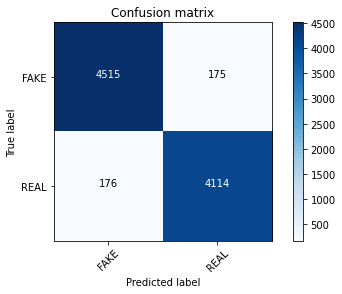

In [77]:
classifier.fit(x_train, y_train)
pred = classifier.predict(x_test)
score = metrics.accuracy_score(y_test, pred)
print("accuracy:   %0.3f" % score)
cm = metrics.confusion_matrix(y_test, pred)
plot_confusion_matrix(cm, classes=['FAKE', 'REAL'])